# 🧠 How Neural Networks Learn: A Gentle Introduction to Backpropagation

**Welcome!** This notebook will teach you the fundamental concepts behind how neural networks learn, starting from absolute basics. We'll go slowly, explain everything, and use lots of colorful visualizations.

## What You'll Learn

1. **Tensors** - The building blocks of deep learning
2. **Gradient Descent** - How to find the bottom of a valley
3. **Backpropagation** - How gradients flow through networks
4. **Optimization Challenges** - What can go wrong and how to fix it

---

## 📦 Setup

Let's import everything we need:

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from IPython.display import display, HTML, Markdown
import warnings
warnings.filterwarnings('ignore')

# Set up beautiful color schemes
COLORS = {
    'coral': '#FF6B6B',
    'teal': '#4ECDC4',
    'yellow': '#FFE66D',
    'purple': '#9B59B6',
    'blue': '#3498DB',
    'green': '#2ECC71',
    'orange': '#F39C12',
    'pink': '#E91E63',
    'navy': '#2C3E50',
    'mint': '#1ABC9C'
}

# Make plots look nice
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

print("✅ All libraries loaded!")
print(f"📦 PyTorch version: {torch.__version__}")

✅ All libraries loaded!
📦 PyTorch version: 2.9.0+cpu


---

# Part 1: Understanding Tensors 🧱

## What is a Tensor?

A **tensor** is just a fancy word for a container of numbers. That's it!

Think of it like this:
- A **single number** (like `5`) is a **0-dimensional tensor** (also called a *scalar*)
- A **list of numbers** (like `[1, 2, 3]`) is a **1-dimensional tensor** (also called a *vector*)
- A **table of numbers** (like a spreadsheet) is a **2-dimensional tensor** (also called a *matrix*)
- And we can keep going to higher dimensions!

Let's see this in code:

In [2]:
# A scalar (0-dimensional tensor) - just one number
scalar = torch.tensor(42)
print("🔢 Scalar (0D tensor):")
print(f"   Value: {scalar}")
print(f"   Shape: {scalar.shape}")
print(f"   Number of dimensions: {scalar.dim()}")
print()

🔢 Scalar (0D tensor):
   Value: 42
   Shape: torch.Size([])
   Number of dimensions: 0



In [3]:
# A vector (1-dimensional tensor) - a list of numbers
vector = torch.tensor([1, 2, 3, 4, 5])
print("📊 Vector (1D tensor):")
print(f"   Value: {vector}")
print(f"   Shape: {vector.shape}  ← This means '5 elements'")
print(f"   Number of dimensions: {vector.dim()}")
print()

📊 Vector (1D tensor):
   Value: tensor([1, 2, 3, 4, 5])
   Shape: torch.Size([5])  ← This means '5 elements'
   Number of dimensions: 1



In [4]:
# A matrix (2-dimensional tensor) - a table of numbers
matrix = torch.tensor([
    [1, 2, 3],
    [4, 5, 6]
])
print("📋 Matrix (2D tensor):")
print(f"   Value:\n{matrix}")
print(f"   Shape: {matrix.shape}  ← This means '2 rows, 3 columns'")
print(f"   Number of dimensions: {matrix.dim()}")
print()

📋 Matrix (2D tensor):
   Value:
tensor([[1, 2, 3],
        [4, 5, 6]])
   Shape: torch.Size([2, 3])  ← This means '2 rows, 3 columns'
   Number of dimensions: 2



In [5]:
# A 3D tensor - like a stack of tables (or a cube of numbers)
tensor_3d = torch.tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
])
print("📦 3D Tensor:")
print(f"   Value:\n{tensor_3d}")
print(f"   Shape: {tensor_3d.shape}  ← '3 tables, each 2x2'")
print(f"   Number of dimensions: {tensor_3d.dim()}")

📦 3D Tensor:
   Value:
tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])
   Shape: torch.Size([3, 2, 2])  ← '3 tables, each 2x2'
   Number of dimensions: 3


## 🎨 Let's Visualize Tensor Dimensions

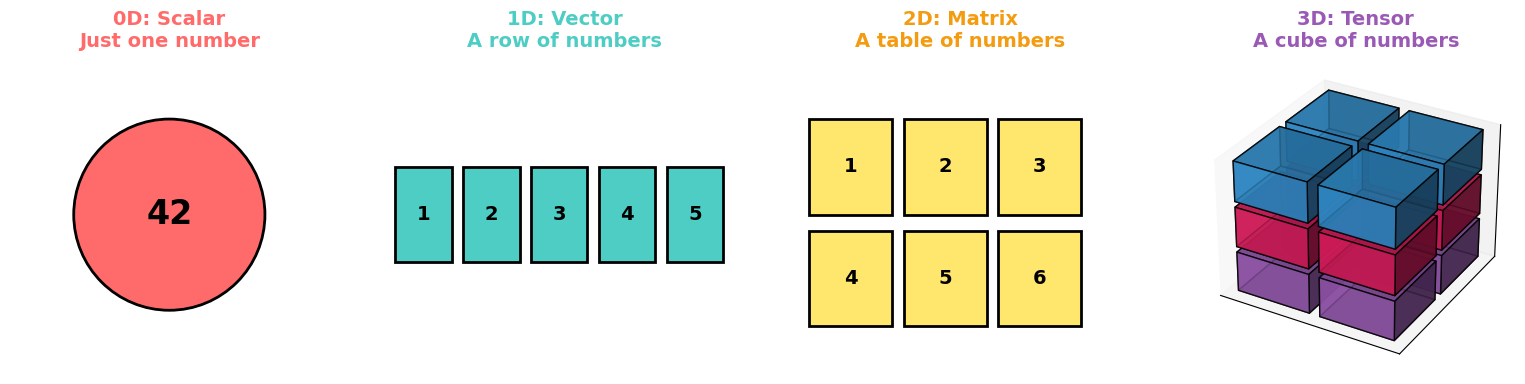

📸 Saved: tensor_dimensions.png


In [6]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Scalar
ax = axes[0]
circle = plt.Circle((0.5, 0.5), 0.3, color=COLORS['coral'], ec='black', lw=2)
ax.add_patch(circle)
ax.text(0.5, 0.5, '42', ha='center', va='center', fontsize=24, fontweight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('0D: Scalar\nJust one number', fontsize=14, fontweight='bold', color=COLORS['coral'])

# Vector
ax = axes[1]
for i, val in enumerate([1, 2, 3, 4, 5]):
    rect = plt.Rectangle((i*0.18 + 0.05, 0.35), 0.15, 0.3,
                          color=COLORS['teal'], ec='black', lw=2)
    ax.add_patch(rect)
    ax.text(i*0.18 + 0.125, 0.5, str(val), ha='center', va='center', fontsize=14, fontweight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('1D: Vector\nA row of numbers', fontsize=14, fontweight='bold', color=COLORS['teal'])

# Matrix
ax = axes[2]
data = [[1, 2, 3], [4, 5, 6]]
for i in range(2):
    for j in range(3):
        rect = plt.Rectangle((j*0.25 + 0.1, (1-i)*0.35 + 0.15), 0.22, 0.3,
                              color=COLORS['yellow'], ec='black', lw=2)
        ax.add_patch(rect)
        ax.text(j*0.25 + 0.21, (1-i)*0.35 + 0.3, str(data[i][j]),
                ha='center', va='center', fontsize=14, fontweight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('2D: Matrix\nA table of numbers', fontsize=14, fontweight='bold', color=COLORS['orange'])

# 3D Tensor
ax = axes[3]
# Draw a simple 3D cube representation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
ax.remove()
ax = fig.add_subplot(1, 4, 4, projection='3d')

# Create cube vertices
colors_3d = [COLORS['purple'], COLORS['pink'], COLORS['blue']]
for z, c in enumerate(colors_3d):
    for x in range(2):
        for y in range(2):
            ax.bar3d(x*0.4, y*0.4, z*0.4, 0.35, 0.35, 0.35,
                    color=c, alpha=0.8, edgecolor='black')

ax.set_xlabel('', fontsize=10)
ax.set_ylabel('', fontsize=10)
ax.set_zlabel('', fontsize=10)
ax.set_title('3D: Tensor\nA cube of numbers', fontsize=14, fontweight='bold', color=COLORS['purple'])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.tight_layout()
plt.savefig('/tmp/tensor_dimensions.png', dpi=150, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()
print("📸 Saved: tensor_dimensions.png")

## 🔧 Creating Tensors in PyTorch

There are many ways to create tensors. Let's learn the most common ones:

In [7]:
# Method 1: From a Python list
from_list = torch.tensor([1.0, 2.0, 3.0])
print("From list:", from_list)

# Method 2: Zeros - all zeros
zeros = torch.zeros(3, 4)  # 3 rows, 4 columns
print("\nZeros (3x4):")
print(zeros)

# Method 3: Ones - all ones
ones = torch.ones(2, 3)  # 2 rows, 3 columns
print("\nOnes (2x3):")
print(ones)

# Method 4: Random numbers
random_tensor = torch.rand(2, 2)  # Random numbers between 0 and 1
print("\nRandom (2x2):")
print(random_tensor)

# Method 5: A range of numbers
range_tensor = torch.arange(0, 10, 2)  # Start=0, End=10, Step=2
print("\nRange (0 to 10, step 2):", range_tensor)

From list: tensor([1., 2., 3.])

Zeros (3x4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Ones (2x3):
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random (2x2):
tensor([[0.4087, 0.4095],
        [0.0799, 0.0540]])

Range (0 to 10, step 2): tensor([0, 2, 4, 6, 8])


## 📐 Tensor Operations

We can do math with tensors just like with regular numbers:

In [8]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print("a =", a)
print("b =", b)
print()

# Addition
print("a + b =", a + b)

# Subtraction
print("a - b =", a - b)

# Multiplication (element-wise)
print("a * b =", a * b)

# Division
print("a / b =", a / b)

# Power
print("a ** 2 =", a ** 2)

# Sum all elements
print("sum(a) =", a.sum())

# Mean (average)
print("mean(a) =", a.mean())

a = tensor([1., 2., 3.])
b = tensor([4., 5., 6.])

a + b = tensor([5., 7., 9.])
a - b = tensor([-3., -3., -3.])
a * b = tensor([ 4., 10., 18.])
a / b = tensor([0.2500, 0.4000, 0.5000])
a ** 2 = tensor([1., 4., 9.])
sum(a) = tensor(6.)
mean(a) = tensor(2.)


## 🎯 Key Concept: Why Do We Need Tensors?

Tensors are essential for deep learning because:

1. **Images** are 3D tensors: (height × width × color_channels)
2. **Videos** are 4D tensors: (time × height × width × color_channels)  
3. **Neural network weights** are stored as tensors
4. **Gradients** (which we'll learn about next!) are computed on tensors

Let's see an example with a fake "image":

Fake image shape: torch.Size([4, 4, 3])
This means: 4 pixels tall, 4 pixels wide, 3 color channels (R, G, B)


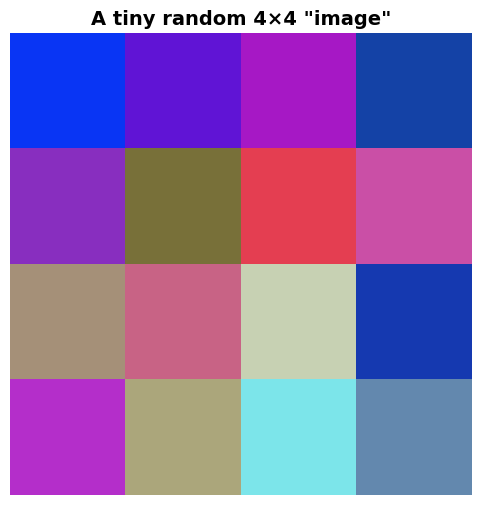

In [9]:
# A tiny 4x4 "image" with 3 color channels (RGB)
fake_image = torch.rand(4, 4, 3)  # height=4, width=4, channels=3

print("Fake image shape:", fake_image.shape)
print("This means: 4 pixels tall, 4 pixels wide, 3 color channels (R, G, B)")

# Let's visualize it!
plt.figure(figsize=(6, 6))
plt.imshow(fake_image.numpy())
plt.title('A tiny random 4×4 "image"', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

---

# Part 2: Gradient Descent - Finding the Bottom of a Valley 🏔️

## The Big Picture

Imagine you're blindfolded on a hilly landscape and you want to find the lowest point (a valley). How would you do it?

**Strategy:** Feel the ground under your feet. Take a small step in the direction that goes downhill. Repeat!

This is exactly what **gradient descent** does!

- The "landscape" is our **loss function** (how wrong our model is)
- The "position" is our **parameters** (the weights in our neural network)
- The "slope" is the **gradient** (which direction is downhill?)
- The "step size" is the **learning rate** (how big of a step do we take?)

## 📉 Let's Start Simple: Minimizing a 1D Function

Let's say we want to find the value of $\theta$ that minimizes:

$$J(\theta) = \theta^2$$

We know the answer is $\theta = 0$ (because $0^2 = 0$ is the smallest), but let's pretend we don't know and use gradient descent to find it!

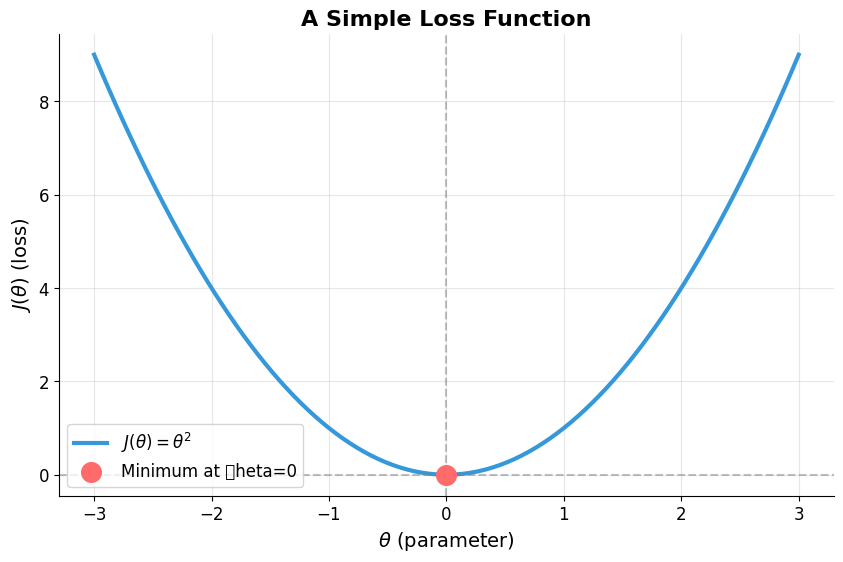

📸 Saved: simple_loss_function.png


In [10]:
# Our loss function: J(θ) = θ²
def J(theta):
    return theta ** 2

# The gradient (derivative): dJ/dθ = 2θ
def gradient_J(theta):
    return 2 * theta

# Let's visualize this function
theta_values = np.linspace(-3, 3, 100)
loss_values = J(theta_values)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, loss_values, color=COLORS['blue'], linewidth=3, label=r'$J(\theta) = \theta^2$')
plt.xlabel(r'$\theta$ (parameter)', fontsize=14)
plt.ylabel(r'$J(\theta)$ (loss)', fontsize=14)
plt.title('A Simple Loss Function', fontsize=16, fontweight='bold')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

# Mark the minimum
plt.scatter([0], [0], color=COLORS['coral'], s=200, zorder=5, label='Minimum at \theta=0')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('/tmp/simple_loss_function.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: simple_loss_function.png")

## 🚶 The Gradient Descent Algorithm

The update rule is beautifully simple:

$$\theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla_\theta J(\theta)$$

Where:
- $\theta_{\text{old}}$ is our current position
- $\eta$ (eta) is the **learning rate** (step size)
- $\nabla_\theta J(\theta)$ is the **gradient** (the slope)
- $\theta_{\text{new}}$ is our new position after taking a step

**The key insight:** We subtract the gradient because we want to go *downhill*!

In [11]:
def gradient_descent_1d(starting_point, learning_rate, num_steps):
    """
    Perform gradient descent on J(θ) = θ²

    Parameters:
    -----------
    starting_point : float
        Where we start on the θ axis
    learning_rate : float
        How big of a step to take (η)
    num_steps : int
        How many steps to take

    Returns:
    --------
    history : list of tuples (theta, loss)
    """
    theta = starting_point
    history = [(theta, J(theta))]

    for step in range(num_steps):
        # Compute the gradient at current position
        grad = gradient_J(theta)

        # Take a step in the opposite direction of the gradient
        theta = theta - learning_rate * grad

        # Record our progress
        history.append((theta, J(theta)))

    return history

# Let's try it!
history = gradient_descent_1d(starting_point=2.5, learning_rate=0.1, num_steps=20)

# Print the journey
print("Step | θ value  | Loss J(θ)")
print("-" * 35)
for i, (theta, loss) in enumerate(history[:10]):
    print(f"{i:4d} | {theta:8.4f} | {loss:8.4f}")
print("...")
print(f"{len(history)-1:4d} | {history[-1][0]:8.4f} | {history[-1][1]:8.4f}")

Step | θ value  | Loss J(θ)
-----------------------------------
   0 |   2.5000 |   6.2500
   1 |   2.0000 |   4.0000
   2 |   1.6000 |   2.5600
   3 |   1.2800 |   1.6384
   4 |   1.0240 |   1.0486
   5 |   0.8192 |   0.6711
   6 |   0.6554 |   0.4295
   7 |   0.5243 |   0.2749
   8 |   0.4194 |   0.1759
   9 |   0.3355 |   0.1126
...
  20 |   0.0288 |   0.0008


## 📊 Visualizing the Journey

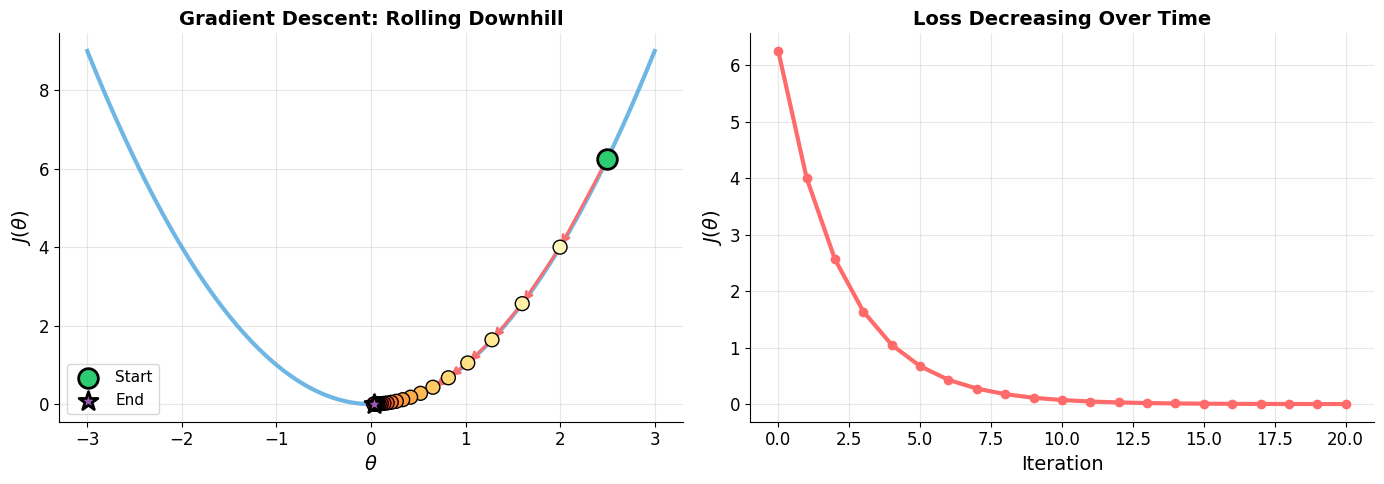

📸 Saved: gradient_descent_1d.png


In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: The path on the loss curve
theta_values = np.linspace(-3, 3, 100)
ax1.plot(theta_values, J(theta_values), color=COLORS['blue'], linewidth=3, alpha=0.7)

# Plot the gradient descent path
thetas = [h[0] for h in history]
losses = [h[1] for h in history]

# Draw arrows between steps
for i in range(len(history) - 1):
    ax1.annotate('', xy=(thetas[i+1], losses[i+1]), xytext=(thetas[i], losses[i]),
                arrowprops=dict(arrowstyle='->', color=COLORS['coral'], lw=2))

# Mark the steps
scatter = ax1.scatter(thetas, losses, c=range(len(thetas)), cmap='YlOrRd',
                      s=100, zorder=5, edgecolors='black')
ax1.scatter([thetas[0]], [losses[0]], color=COLORS['green'], s=200, zorder=6,
            label='Start', edgecolors='black', linewidth=2)
ax1.scatter([thetas[-1]], [losses[-1]], color=COLORS['purple'], s=200, zorder=6,
            label='End', marker='*', edgecolors='black', linewidth=2)

ax1.set_xlabel(r'$\theta$', fontsize=14)
ax1.set_ylabel(r'$J(\theta)$', fontsize=14)
ax1.set_title('Gradient Descent: Rolling Downhill', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Right plot: Loss over iterations
ax2.plot(range(len(losses)), losses, color=COLORS['coral'], linewidth=3, marker='o', markersize=6)
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel(r'$J(\theta)$', fontsize=14)
ax2.set_title('Loss Decreasing Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/gradient_descent_1d.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: gradient_descent_1d.png")

## 🎛️ The Learning Rate: How Big Should Our Steps Be?

The learning rate $\eta$ is crucial:
- **Too small:** We'll take forever to reach the minimum
- **Too large:** We might overshoot and bounce around (or even diverge!)
- **Just right:** We converge smoothly

Let's see this in action:

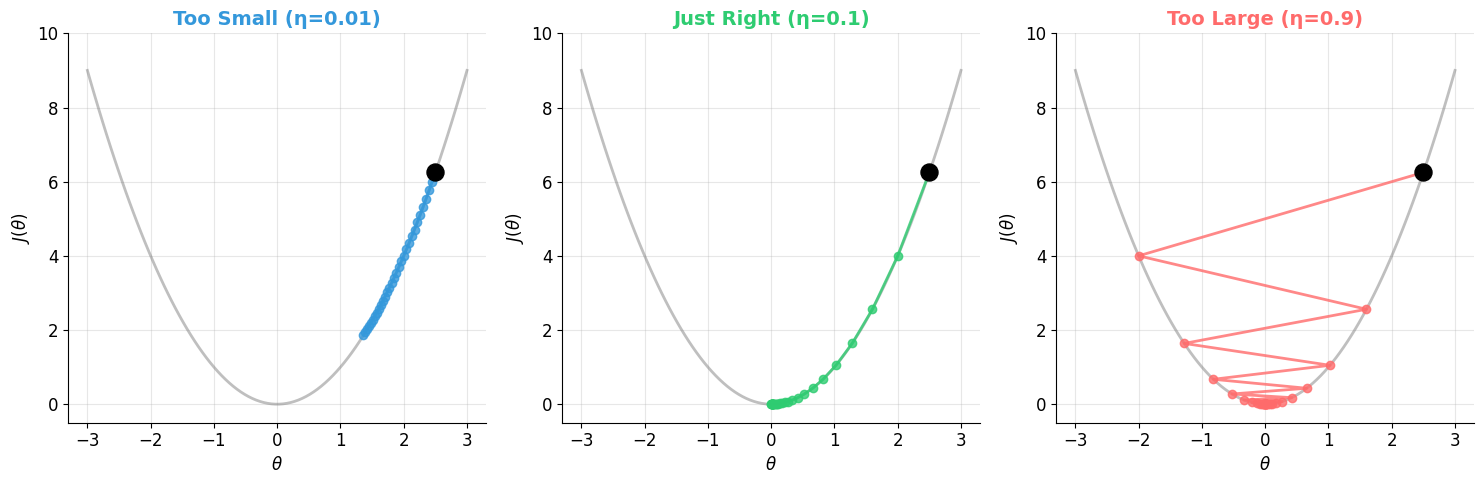

📸 Saved: learning_rate_comparison.png


In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

learning_rates = [0.01, 0.1, 0.9]
titles = ['Too Small (η=0.01)', 'Just Right (η=0.1)', 'Too Large (η=0.9)']
colors = [COLORS['blue'], COLORS['green'], COLORS['coral']]

theta_values = np.linspace(-3, 3, 100)

for ax, lr, title, color in zip(axes, learning_rates, titles, colors):
    # Run gradient descent
    history = gradient_descent_1d(starting_point=2.5, learning_rate=lr, num_steps=30)
    thetas = [h[0] for h in history]
    losses = [h[1] for h in history]

    # Plot the loss curve
    ax.plot(theta_values, J(theta_values), color='gray', linewidth=2, alpha=0.5)

    # Plot the path
    ax.plot(thetas, losses, color=color, linewidth=2, marker='o', markersize=6, alpha=0.8)
    ax.scatter([thetas[0]], [losses[0]], color='black', s=150, zorder=5, marker='o')

    ax.set_xlabel(r'$\theta$', fontsize=12)
    ax.set_ylabel(r'$J(\theta)$', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold', color=color)
    ax.set_ylim(-0.5, 10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/learning_rate_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: learning_rate_comparison.png")

---

# Part 3: PyTorch Autograd - Automatic Differentiation ✨

## The Magic of `requires_grad=True`

Computing gradients by hand is tedious and error-prone. PyTorch can do it automatically!

When you create a tensor with `requires_grad=True`, PyTorch will:
1. Track all operations performed on that tensor
2. Build a computational graph
3. Automatically compute gradients when you call `.backward()`

In [14]:
# Create a tensor and tell PyTorch to track gradients
theta = torch.tensor([2.5], requires_grad=True)

print("θ =", theta)
print("Is PyTorch tracking gradients?", theta.requires_grad)

θ = tensor([2.5000], requires_grad=True)
Is PyTorch tracking gradients? True


In [15]:
# Compute J(θ) = θ²
J = theta ** 2

print("J(θ) = θ² =", J)
print("\nPyTorch has built a computational graph!")
print("J knows it came from:", J.grad_fn)

J(θ) = θ² = tensor([6.2500], grad_fn=<PowBackward0>)

PyTorch has built a computational graph!
J knows it came from: <PowBackward0 object at 0x7a67280aab30>


In [16]:
# Compute the gradient! (This is backpropagation)
J.backward()

print("The gradient dJ/dθ =", theta.grad)
print("\nLet's verify: d(θ²)/dθ = 2θ = 2 × 2.5 =", 2 * 2.5)
print("✅ It matches!")

The gradient dJ/dθ = tensor([5.])

Let's verify: d(θ²)/dθ = 2θ = 2 × 2.5 = 5.0
✅ It matches!


## 🔗 Gradients Through Chains of Operations

The real power of autograd is computing gradients through complex chains of operations. Let's try:

$$J = ((\theta + 2)^2 - 1)^3$$

In [17]:
# Fresh tensor
theta = torch.tensor([1.0], requires_grad=True)

# Chain of operations (forward pass)
a = theta + 2      # a = θ + 2
b = a ** 2         # b = a²
c = b - 1          # c = b - 1
J = c ** 3         # J = c³

print("Forward pass:")
print(f"  θ = {theta.item():.2f}")
print(f"  a = θ + 2 = {a.item():.2f}")
print(f"  b = a² = {b.item():.2f}")
print(f"  c = b - 1 = {c.item():.2f}")
print(f"  J = c³ = {J.item():.2f}")

Forward pass:
  θ = 1.00
  a = θ + 2 = 3.00
  b = a² = 9.00
  c = b - 1 = 8.00
  J = c³ = 512.00


In [18]:
# Backward pass (compute all gradients!)
J.backward()

print("Backward pass (automatic differentiation):")
print(f"  dJ/dθ = {theta.grad.item():.2f}")

# Let's verify manually using the chain rule:
# dJ/dθ = dJ/dc × dc/db × db/da × da/dθ
#       = 3c² × 1 × 2a × 1
#       = 3(8)² × 2(3)
#       = 192 × 6 = 1152
print("\nManual verification using chain rule:")
print(f"  dJ/dc = 3c² = 3×8² = {3 * 8**2}")
print(f"  dc/db = 1")
print(f"  db/da = 2a = 2×3 = {2 * 3}")
print(f"  da/dθ = 1")
print(f"  dJ/dθ = {3 * 8**2} × 1 × {2*3} × 1 = {3 * 8**2 * 6}")
print("✅ It matches!")

Backward pass (automatic differentiation):
  dJ/dθ = 1152.00

Manual verification using chain rule:
  dJ/dc = 3c² = 3×8² = 192
  dc/db = 1
  db/da = 2a = 2×3 = 6
  da/dθ = 1
  dJ/dθ = 192 × 1 × 6 × 1 = 1152
✅ It matches!


## 🖼️ Visualizing the Computational Graph

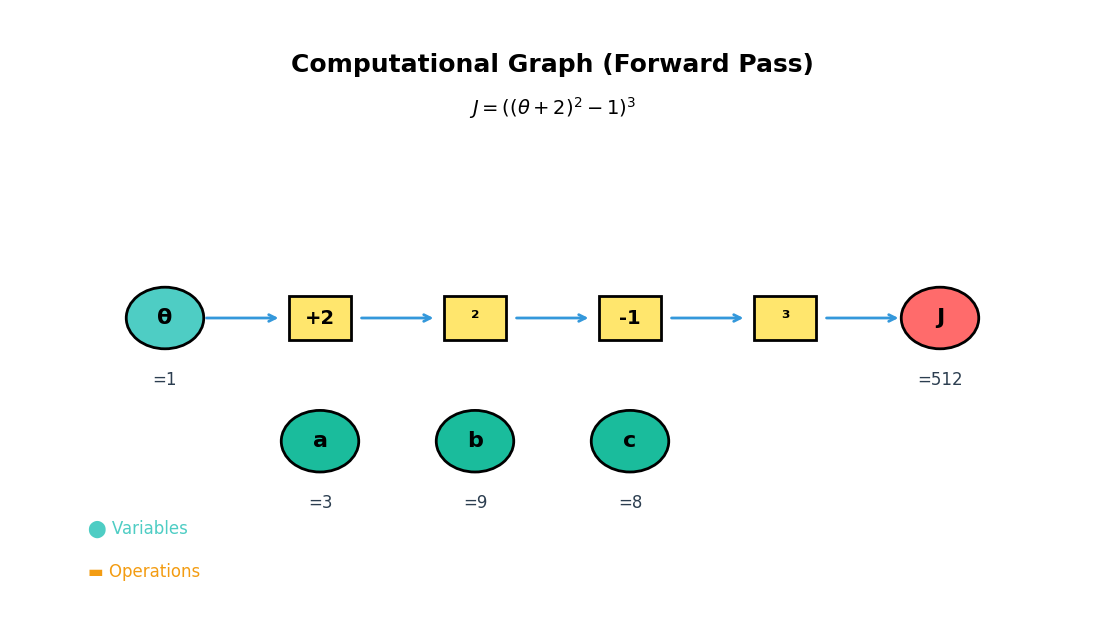

📸 Saved: computational_graph.png


In [19]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 14)
ax.set_ylim(0, 10)
ax.axis('off')

# Node positions
positions = {
    'θ': (2, 5),
    '+2': (4, 5),
    'a': (4, 3),
    '²': (6, 5),
    'b': (6, 3),
    '-1': (8, 5),
    'c': (8, 3),
    '³': (10, 5),
    'J': (12, 5)
}

# Draw nodes
node_colors = {
    'θ': COLORS['teal'],
    '+2': COLORS['yellow'],
    'a': COLORS['mint'],
    '²': COLORS['yellow'],
    'b': COLORS['mint'],
    '-1': COLORS['yellow'],
    'c': COLORS['mint'],
    '³': COLORS['yellow'],
    'J': COLORS['coral']
}

for name, (x, y) in positions.items():
    if name in ['θ', 'a', 'b', 'c', 'J']:
        circle = plt.Circle((x, y), 0.5, color=node_colors[name], ec='black', lw=2)
        ax.add_patch(circle)
        ax.text(x, y, name, ha='center', va='center', fontsize=16, fontweight='bold')
    else:
        rect = plt.Rectangle((x-0.4, y-0.35), 0.8, 0.7, color=node_colors[name], ec='black', lw=2)
        ax.add_patch(rect)
        ax.text(x, y, name, ha='center', va='center', fontsize=14, fontweight='bold')

# Draw forward pass arrows (top)
forward_arrows = [
    ('θ', '+2'), ('+2', '²'), ('²', '-1'), ('-1', '³'), ('³', 'J')
]
for start, end in forward_arrows:
    x1, y1 = positions[start]
    x2, y2 = positions[end]
    ax.annotate('', xy=(x2-0.5, y2), xytext=(x1+0.5, y1),
                arrowprops=dict(arrowstyle='->', color=COLORS['blue'], lw=2))

# Draw intermediate values
values = {'a': '3', 'b': '9', 'c': '8', 'θ': '1', 'J': '512'}
for name, val in values.items():
    x, y = positions[name]
    ax.text(x, y-1, f'={val}', ha='center', va='center', fontsize=12, color=COLORS['navy'])

# Title and labels
ax.text(7, 9, 'Computational Graph (Forward Pass)', ha='center', fontsize=18, fontweight='bold')
ax.text(7, 8.3, r'$J = ((\theta + 2)^2 - 1)^3$', ha='center', fontsize=14)

# Legend
ax.text(1, 1.5, '⬤ Variables', fontsize=12, color=COLORS['teal'])
ax.text(1, 0.8, '▬ Operations', fontsize=12, color=COLORS['orange'])

plt.savefig('/tmp/computational_graph.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: computational_graph.png")

## 🔄 Gradient Descent with PyTorch

Now let's put it all together and do gradient descent the PyTorch way!

In [20]:
# Starting point
theta = torch.tensor([2.5], requires_grad=True)

# Hyperparameters
learning_rate = 0.1
num_steps = 20

# Store history for visualization
history = []

print("Gradient Descent with PyTorch Autograd")
print("=" * 40)

for step in range(num_steps):
    # Forward pass: compute J(θ) = θ²
    J = theta ** 2

    # Store current state
    history.append((theta.item(), J.item()))

    # Backward pass: compute gradient
    J.backward()

    if step < 5 or step == num_steps - 1:
        print(f"Step {step}: θ={theta.item():.4f}, J={J.item():.4f}, grad={theta.grad.item():.4f}")
    elif step == 5:
        print("...")

    # Update parameters (gradient descent step)
    # We use torch.no_grad() because we don't want this operation tracked
    with torch.no_grad():
        theta -= learning_rate * theta.grad

    # Zero the gradient for next iteration
    # (PyTorch accumulates gradients by default)
    theta.grad.zero_()

print(f"\n✅ Final: θ = {theta.item():.6f} (should be close to 0)")

Gradient Descent with PyTorch Autograd
Step 0: θ=2.5000, J=6.2500, grad=5.0000
Step 1: θ=2.0000, J=4.0000, grad=4.0000
Step 2: θ=1.6000, J=2.5600, grad=3.2000
Step 3: θ=1.2800, J=1.6384, grad=2.5600
Step 4: θ=1.0240, J=1.0486, grad=2.0480
...
Step 19: θ=0.0360, J=0.0013, grad=0.0721

✅ Final: θ = 0.028823 (should be close to 0)


---

# Part 4: Loss Landscape Challenges 🏔️⚠️

In the real world, loss functions aren't always nice and smooth like $\theta^2$. Let's explore the different challenges from your slides!

In [21]:
# Define different loss functions that illustrate various challenges

def convex_loss(theta):
    """Nice convex loss - easy to optimize"""
    return theta ** 2

def local_minima_loss(theta):
    """Has multiple local minima - can get stuck!"""
    return 0.5 * theta ** 2 - 0.5 * np.cos(5 * theta)

def vanishing_gradient_loss(theta):
    """Flat regions - gradient nearly zero"""
    return np.tanh(theta / 2) * 0.5

def exploding_gradient_loss(theta):
    """Steep valley - gradient can be huge"""
    return np.abs(theta) ** 0.5

def step_function_loss(theta):
    """Discontinuous - gradient is undefined at some points"""
    return np.where(theta < 0, 0.25, -0.25) + theta * 0.3

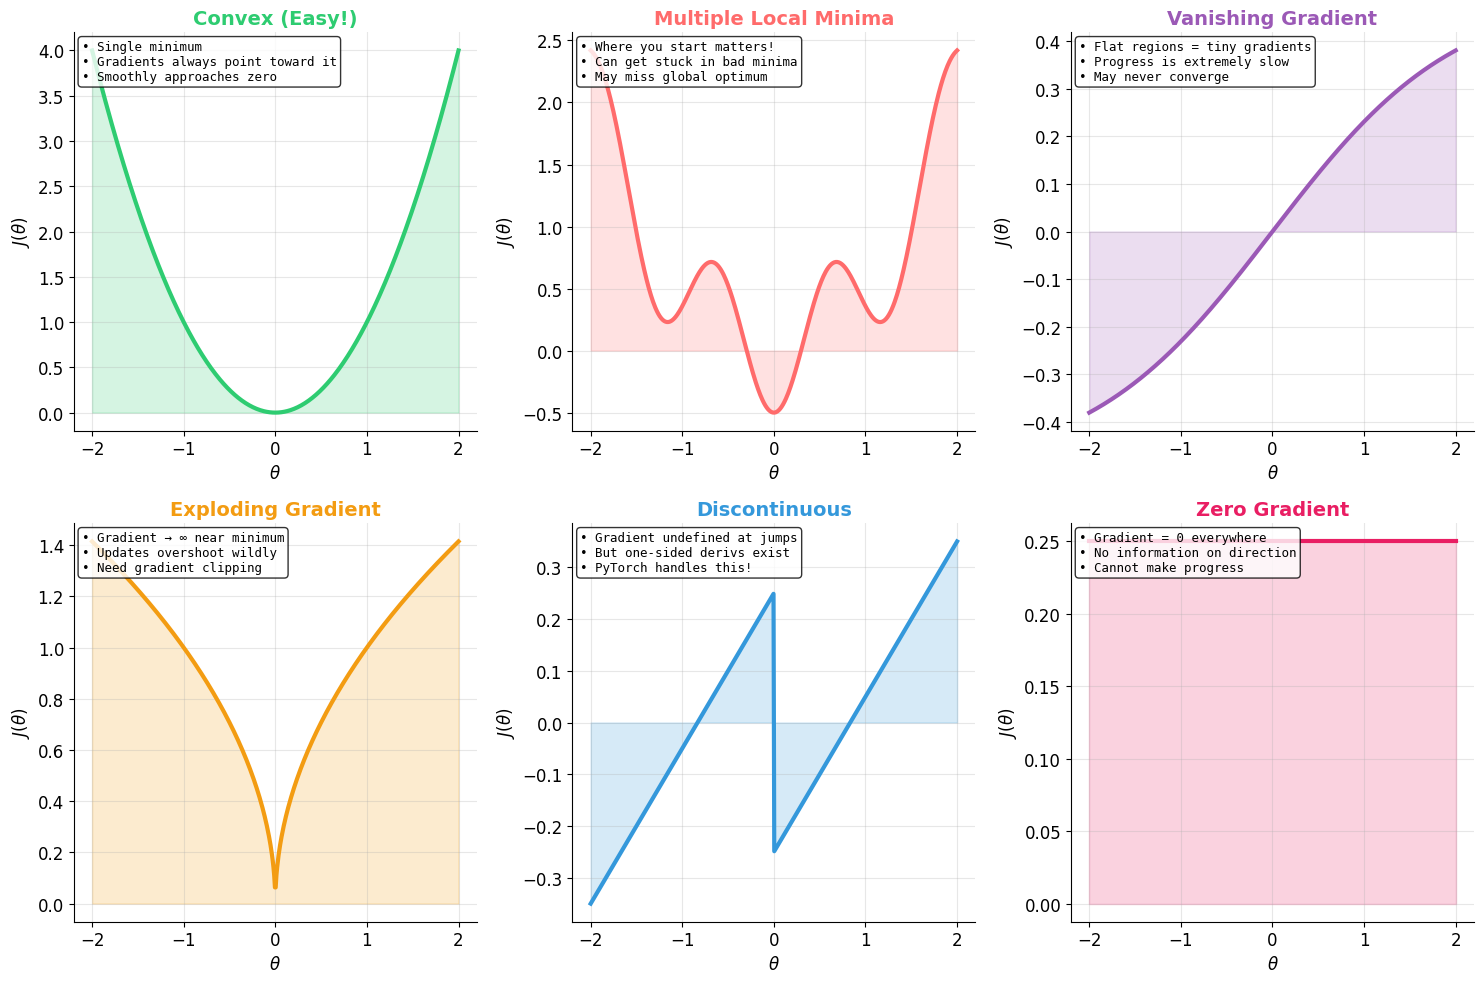

📸 Saved: loss_landscape_challenges.png


In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
theta_values = np.linspace(-2, 2, 500)

loss_functions = [
    (convex_loss, 'Convex (Easy!)', COLORS['green'],
     '• Single minimum\n• Gradients always point toward it\n• Smoothly approaches zero'),

    (local_minima_loss, 'Multiple Local Minima', COLORS['coral'],
     '• Where you start matters!\n• Can get stuck in bad minima\n• May miss global optimum'),

    (vanishing_gradient_loss, 'Vanishing Gradient', COLORS['purple'],
     '• Flat regions = tiny gradients\n• Progress is extremely slow\n• May never converge'),

    (exploding_gradient_loss, 'Exploding Gradient', COLORS['orange'],
     '• Gradient → ∞ near minimum\n• Updates overshoot wildly\n• Need gradient clipping'),

    (step_function_loss, 'Discontinuous', COLORS['blue'],
     '• Gradient undefined at jumps\n• But one-sided derivs exist\n• PyTorch handles this!'),

    (lambda x: x * 0 + 0.25, 'Zero Gradient', COLORS['pink'],
     '• Gradient = 0 everywhere\n• No information on direction\n• Cannot make progress')
]

for ax, (loss_fn, title, color, description) in zip(axes.flat, loss_functions):
    y_values = loss_fn(theta_values)
    ax.plot(theta_values, y_values, color=color, linewidth=3)
    ax.fill_between(theta_values, y_values, alpha=0.2, color=color)
    ax.set_xlabel(r'$\theta$', fontsize=12)
    ax.set_ylabel(r'$J(\theta)$', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold', color=color)
    ax.grid(True, alpha=0.3)

    # Add description box
    ax.text(0.02, 0.98, description, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('/tmp/loss_landscape_challenges.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: loss_landscape_challenges.png")

## 🎬 Animated Optimization on Different Landscapes

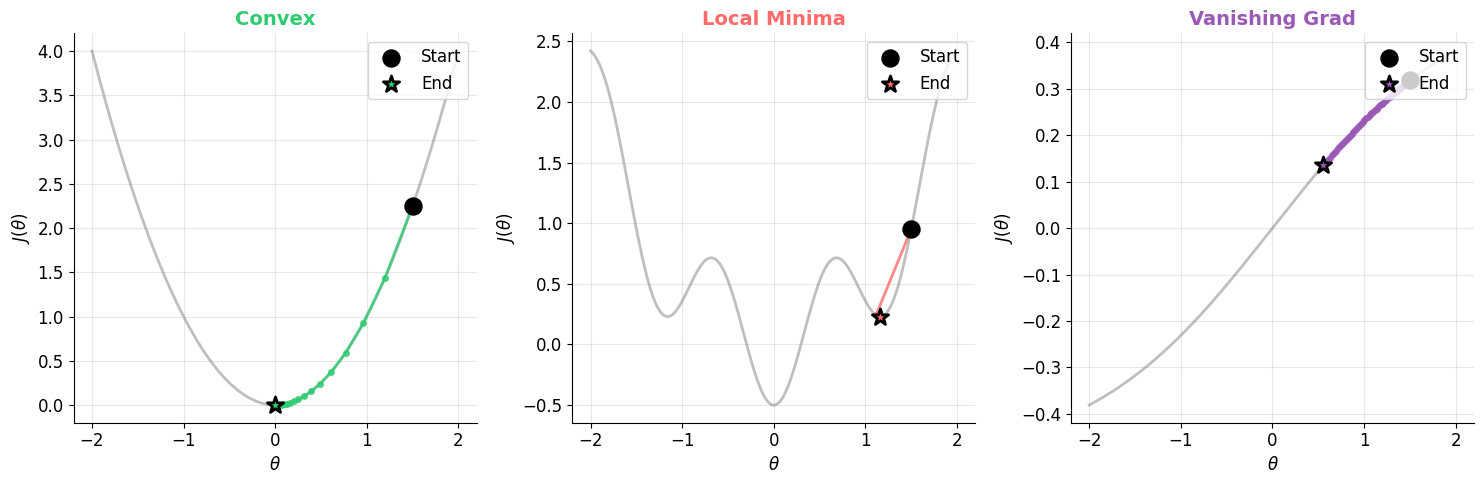

📸 Saved: optimization_comparison.png


In [23]:
def run_gradient_descent_numpy(loss_fn, grad_fn, start, lr, steps):
    """Run gradient descent and return history"""
    theta = start
    history = [(theta, loss_fn(theta))]

    for _ in range(steps):
        grad = grad_fn(theta)
        theta = theta - lr * grad
        # Clip to prevent going off chart
        theta = np.clip(theta, -1.9, 1.9)
        history.append((theta, loss_fn(theta)))

    return history

# Loss functions and their gradients
losses_and_grads = [
    (lambda x: x**2, lambda x: 2*x, 'Convex', COLORS['green']),
    (local_minima_loss, lambda x: x + 2.5*np.sin(5*x), 'Local Minima', COLORS['coral']),
    (lambda x: np.tanh(x/2)*0.5, lambda x: 0.25/(np.cosh(x/2)**2), 'Vanishing Grad', COLORS['purple']),
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
theta_values = np.linspace(-2, 2, 200)

for ax, (loss_fn, grad_fn, title, color) in zip(axes, losses_and_grads):
    # Plot loss landscape
    ax.plot(theta_values, [loss_fn(t) for t in theta_values],
            color='gray', linewidth=2, alpha=0.5)

    # Run optimization
    history = run_gradient_descent_numpy(loss_fn, grad_fn, start=1.5, lr=0.1, steps=50)
    thetas = [h[0] for h in history]
    losses = [h[1] for h in history]

    # Plot path
    ax.plot(thetas, losses, color=color, linewidth=2, marker='o', markersize=4, alpha=0.8)
    ax.scatter([thetas[0]], [losses[0]], color='black', s=150, zorder=5, marker='o', label='Start')
    ax.scatter([thetas[-1]], [losses[-1]], color=color, s=150, zorder=5, marker='*',
               edgecolors='black', linewidth=2, label='End')

    ax.set_xlabel(r'$\theta$', fontsize=12)
    ax.set_ylabel(r'$J(\theta)$', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold', color=color)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/optimization_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: optimization_comparison.png")

---

# Part 5: Momentum - Building Up Speed 🏃‍♂️

## The Heavy Ball Analogy

Imagine rolling a heavy ball down a hill:
- It builds up speed as it goes
- It can roll through small bumps
- Its previous direction influences where it goes next

**Momentum** adds this "memory" to gradient descent:

$$v^{t+1} = \mu \cdot v^t - \eta \cdot \nabla J(\theta^t)$$
$$\theta^{t+1} = \theta^t + v^{t+1}$$

Where:
- $v$ is the velocity (accumulated gradient direction)
- $\mu$ is the momentum coefficient (typically 0.9)

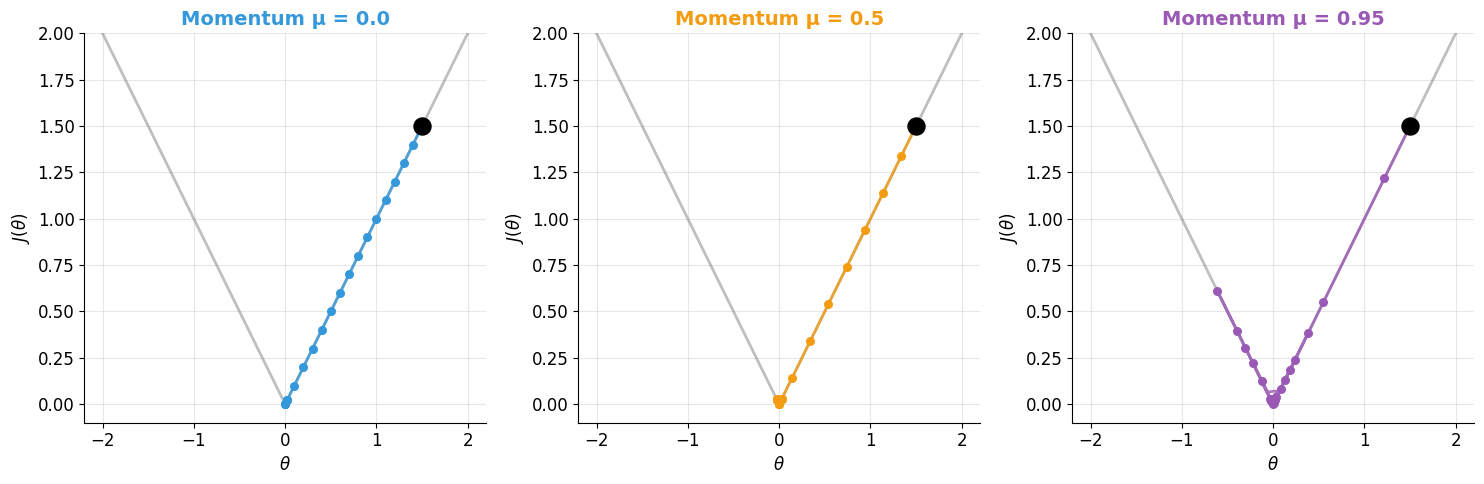

📸 Saved: momentum_comparison.png


In [24]:
def gradient_descent_with_momentum(loss_fn, grad_fn, start, lr, momentum, steps):
    """Gradient descent with momentum"""
    theta = start
    velocity = 0
    history = [(theta, loss_fn(theta))]

    for _ in range(steps):
        grad = grad_fn(theta)
        velocity = momentum * velocity - lr * grad
        theta = theta + velocity
        theta = np.clip(theta, -1.9, 1.9)
        history.append((theta, loss_fn(theta)))

    return history

# Compare different momentum values
loss_fn = lambda x: np.abs(x)  # Simple absolute value
grad_fn = lambda x: np.sign(x)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
theta_values = np.linspace(-2, 2, 200)

momentums = [0.0, 0.5, 0.95]
colors = [COLORS['blue'], COLORS['orange'], COLORS['purple']]

for ax, mu, color in zip(axes, momentums, colors):
    # Plot loss
    ax.plot(theta_values, np.abs(theta_values), color='gray', linewidth=2, alpha=0.5)

    # Run optimization
    history = gradient_descent_with_momentum(loss_fn, grad_fn, start=1.5,
                                             lr=0.02, momentum=mu, steps=100)
    thetas = [h[0] for h in history]
    losses = [h[1] for h in history]

    # Plot path
    ax.plot(thetas, losses, color=color, linewidth=2, alpha=0.8)
    ax.scatter(thetas[::5], losses[::5], color=color, s=30, zorder=5)
    ax.scatter([thetas[0]], [losses[0]], color='black', s=150, zorder=6, marker='o')

    ax.set_xlabel(r'$\theta$', fontsize=12)
    ax.set_ylabel(r'$J(\theta)$', fontsize=12)
    ax.set_title(f'Momentum μ = {mu}', fontsize=14, fontweight='bold', color=color)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.1, 2)

plt.tight_layout()
plt.savefig('/tmp/momentum_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: momentum_comparison.png")

---

# Part 6: 2D Gradient Descent Visualization 🌄

Let's see gradient descent on a 2D surface - this is closer to real neural network optimization!

In [25]:
def loss_2d(theta1, theta2):
    """A 2D loss function with a valley"""
    return (theta1 - 1)**2 + 10*(theta2 - theta1**2)**2

def grad_2d(theta1, theta2):
    """Gradient of the 2D loss"""
    d1 = 2*(theta1 - 1) - 40*theta1*(theta2 - theta1**2)
    d2 = 20*(theta2 - theta1**2)
    return d1, d2

# Create meshgrid for plotting
theta1_range = np.linspace(-2, 2, 100)
theta2_range = np.linspace(-1, 3, 100)
T1, T2 = np.meshgrid(theta1_range, theta2_range)
Z = loss_2d(T1, T2)

# Run gradient descent
def gd_2d(start, lr, steps):
    theta1, theta2 = start
    history = [(theta1, theta2, loss_2d(theta1, theta2))]

    # Define clipping bounds based on the plotting ranges
    theta1_min, theta1_max = theta1_range.min(), theta1_range.max()
    theta2_min, theta2_max = theta2_range.min(), theta2_range.max()

    for _ in range(steps):
        g1, g2 = grad_2d(theta1, theta2)
        theta1 = theta1 - lr * g1
        theta2 = theta2 - lr * g2
        # Clip theta1 and theta2 to prevent numerical overflow
        theta1 = np.clip(theta1, theta1_min, theta1_max)
        theta2 = np.clip(theta2, theta2_min, theta2_max)
        history.append((theta1, theta2, loss_2d(theta1, theta2)))

    return history

history = gd_2d(start=(-1.5, 2.5), lr=0.02, steps=200)

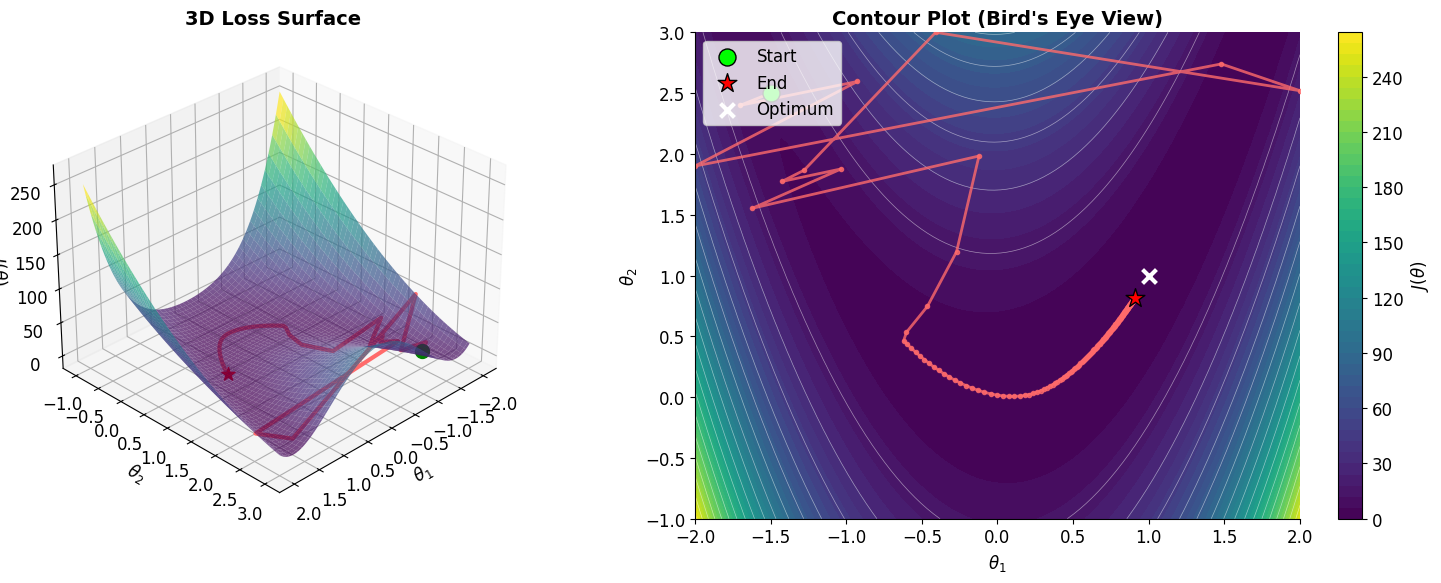

📸 Saved: gradient_descent_2d.png


In [26]:
fig = plt.figure(figsize=(16, 6))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(T1, T2, Z, cmap='viridis', alpha=0.7, linewidth=0)

# Plot the optimization path in 3D
path_t1 = [h[0] for h in history]
path_t2 = [h[1] for h in history]
path_loss = [h[2] for h in history]
ax1.plot(path_t1, path_t2, path_loss, color=COLORS['coral'], linewidth=3, label='GD Path')
ax1.scatter([path_t1[0]], [path_t2[0]], [path_loss[0]], color='green', s=100, label='Start')
ax1.scatter([path_t1[-1]], [path_t2[-1]], [path_loss[-1]], color='red', s=100, marker='*', label='End')

ax1.set_xlabel(r'$\theta_1$', fontsize=12)
ax1.set_ylabel(r'$\theta_2$', fontsize=12)
ax1.set_zlabel(r'$J(\theta)$', fontsize=12)
ax1.set_title('3D Loss Surface', fontsize=14, fontweight='bold')
ax1.view_init(elev=30, azim=45)

# 2D contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(T1, T2, Z, levels=50, cmap='viridis')
ax2.contour(T1, T2, Z, levels=20, colors='white', linewidths=0.5, alpha=0.5)

# Plot path
ax2.plot(path_t1, path_t2, color=COLORS['coral'], linewidth=2, marker='o', markersize=3, alpha=0.8)
ax2.scatter([path_t1[0]], [path_t2[0]], color='lime', s=150, zorder=5, edgecolors='black', label='Start')
ax2.scatter([path_t1[-1]], [path_t2[-1]], color='red', s=200, zorder=5, marker='*', edgecolors='black', label='End')
ax2.scatter([1], [1], color='white', s=100, zorder=5, marker='x', linewidth=3, label='Optimum')

ax2.set_xlabel(r'$\theta_1$', fontsize=12)
ax2.set_ylabel(r'$\theta_2$', fontsize=12)
ax2.set_title('Contour Plot (Bird\'s Eye View)', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left')
plt.colorbar(contour, ax=ax2, label=r'$J(\theta)$')

plt.tight_layout()
plt.savefig('/tmp/gradient_descent_2d.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: gradient_descent_2d.png")

---

# Part 7: Stochastic Gradient Descent (SGD) 🎲

In real neural networks, we don't compute gradients on the entire dataset at once. Instead, we use **mini-batches** - small random samples of the data.

## Why SGD?

1. **Speed:** Computing gradients on millions of examples is slow
2. **Memory:** Can't fit all data in GPU memory at once
3. **Regularization:** The noise acts as implicit regularization

## The Tradeoff

| Batch Size | Speed | Gradient Accuracy | Memory |
|------------|-------|-------------------|--------|
| 1 (Pure SGD) | Fast | Very noisy | Low |
| 32-128 | Balanced | Somewhat noisy | Medium |
| Full dataset | Slow | Exact | High |

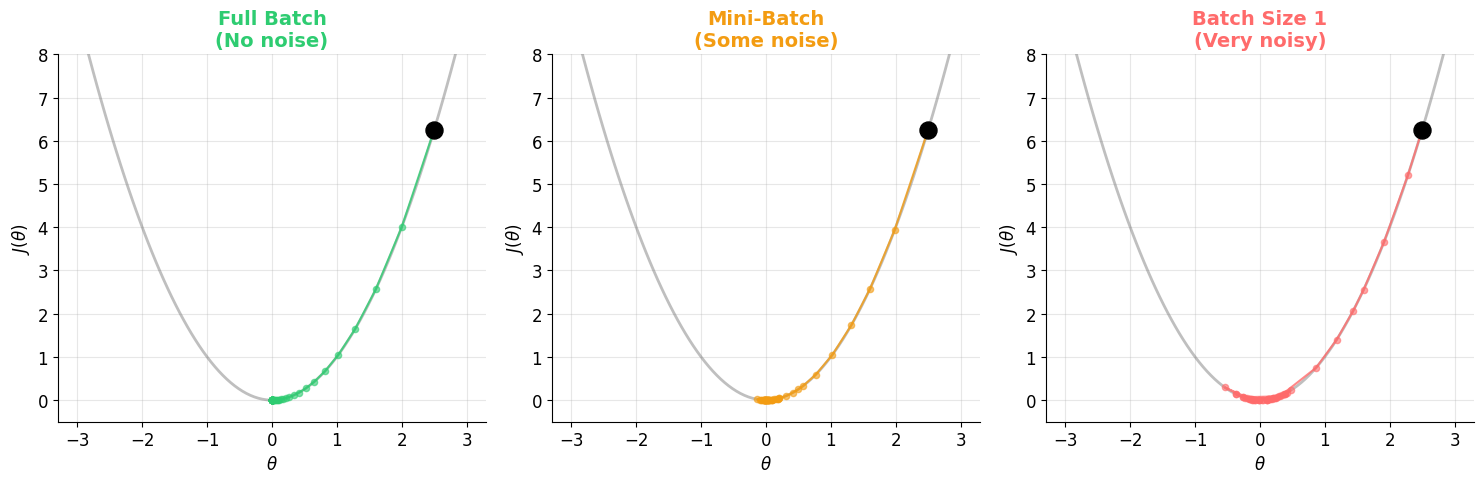

📸 Saved: sgd_comparison.png


In [27]:
# Simulate SGD with different batch sizes
np.random.seed(42)

def noisy_gradient(theta, noise_scale):
    """Gradient with noise to simulate stochastic estimation"""
    true_grad = 2 * theta
    noise = np.random.normal(0, noise_scale)
    return true_grad + noise

def sgd_with_noise(start, lr, steps, noise_scale):
    theta = start
    history = [(theta, theta**2)]

    for _ in range(steps):
        grad = noisy_gradient(theta, noise_scale)
        theta = theta - lr * grad
        history.append((theta, theta**2))

    return history

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
theta_values = np.linspace(-3, 3, 100)

noise_levels = [(0.0, 'Full Batch\n(No noise)'),
                (0.5, 'Mini-Batch\n(Some noise)'),
                (2.0, 'Batch Size 1\n(Very noisy)')]
colors = [COLORS['green'], COLORS['orange'], COLORS['coral']]

for ax, (noise, label), color in zip(axes, noise_levels, colors):
    ax.plot(theta_values, theta_values**2, color='gray', linewidth=2, alpha=0.5)

    history = sgd_with_noise(start=2.5, lr=0.1, steps=50, noise_scale=noise)
    thetas = [h[0] for h in history]
    losses = [h[1] for h in history]

    ax.plot(thetas, losses, color=color, linewidth=1.5, alpha=0.8)
    ax.scatter(thetas, losses, color=color, s=20, zorder=5, alpha=0.6)
    ax.scatter([thetas[0]], [losses[0]], color='black', s=150, zorder=6)

    ax.set_xlabel(r'$\theta$', fontsize=12)
    ax.set_ylabel(r'$J(\theta)$', fontsize=12)
    ax.set_title(label, fontsize=14, fontweight='bold', color=color)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.5, 8)

plt.tight_layout()
plt.savefig('/tmp/sgd_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: sgd_comparison.png")

---

# Part 8: Backpropagation Through an MLP 🧬

Let's build a simple Multi-Layer Perceptron (MLP) and see how gradients flow backward!

In [28]:
import torch.nn as nn

# A simple MLP
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 4)  # 2 inputs -> 4 hidden
        self.layer2 = nn.Linear(4, 4)  # 4 hidden -> 4 hidden
        self.layer3 = nn.Linear(4, 1)  # 4 hidden -> 1 output
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Create model
model = SimpleMLP()

# Print architecture
print("🏗️ Model Architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

🏗️ Model Architecture:
SimpleMLP(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=4, bias=True)
  (layer3): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)

Total parameters: 37


In [29]:
# Forward pass
x = torch.tensor([[1.0, 2.0]])  # One sample with 2 features
y_true = torch.tensor([[1.0]])  # Target

# Predict
y_pred = model(x)
print(f"Input: {x}")
print(f"Prediction: {y_pred.item():.4f}")
print(f"Target: {y_true.item():.4f}")

# Compute loss (Mean Squared Error)
loss = (y_pred - y_true) ** 2
print(f"Loss: {loss.item():.4f}")

Input: tensor([[1., 2.]])
Prediction: -0.0231
Target: 1.0000
Loss: 1.0468


In [30]:
# Backward pass - compute all gradients!
loss.backward()

print("📊 Gradients for each layer:")
print("=" * 50)

for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"\n{name}:")
        print(f"  Shape: {param.shape}")
        print(f"  Gradient mean: {param.grad.mean().item():.6f}")
        print(f"  Gradient std:  {param.grad.std().item():.6f}")

📊 Gradients for each layer:

layer1.weight:
  Shape: torch.Size([4, 2])
  Gradient mean: -0.020599
  Gradient std:  0.194582

layer1.bias:
  Shape: torch.Size([4])
  Gradient mean: -0.013732
  Gradient std:  0.132831

layer2.weight:
  Shape: torch.Size([4, 4])
  Gradient mean: -0.080878
  Gradient std:  0.404802

layer2.bias:
  Shape: torch.Size([4])
  Gradient mean: -0.152824
  Gradient std:  0.472279

layer3.weight:
  Shape: torch.Size([1, 4])
  Gradient mean: -0.535054
  Gradient std:  0.619106

layer3.bias:
  Shape: torch.Size([1])
  Gradient mean: -2.046246
  Gradient std:  nan


## 🎨 Visualizing Gradient Flow

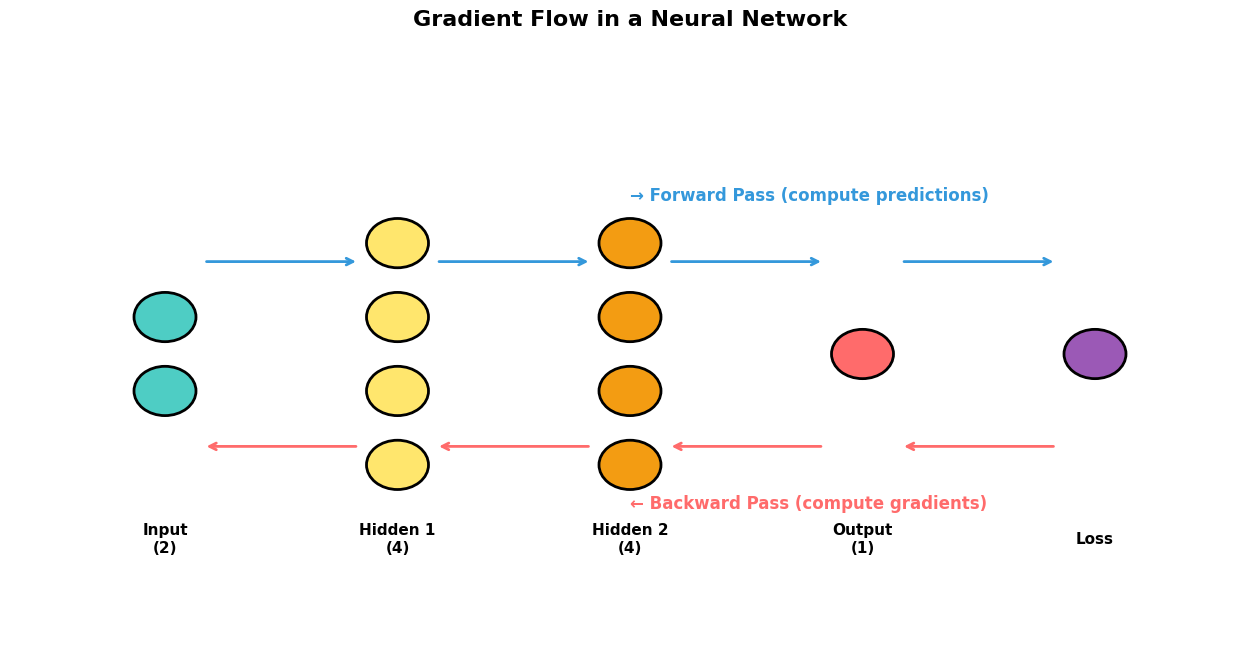

📸 Saved: gradient_flow_mlp.png


In [31]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(0, 16)
ax.set_ylim(0, 10)
ax.axis('off')

# Layer positions
layer_x = [2, 5, 8, 11, 14]
layer_names = ['Input\n(2)', 'Hidden 1\n(4)', 'Hidden 2\n(4)', 'Output\n(1)', 'Loss']
layer_sizes = [2, 4, 4, 1, 1]
layer_colors = [COLORS['teal'], COLORS['yellow'], COLORS['orange'], COLORS['coral'], COLORS['purple']]

# Draw layers
for x, name, size, color in zip(layer_x, layer_names, layer_sizes, layer_colors):
    # Draw neurons
    for i in range(size):
        y = 5 + (i - (size-1)/2) * 1.2
        circle = plt.Circle((x, y), 0.4, color=color, ec='black', lw=2)
        ax.add_patch(circle)

    # Layer label
    ax.text(x, 2, name, ha='center', va='center', fontsize=11, fontweight='bold')

# Draw forward pass arrows
for i in range(len(layer_x) - 1):
    ax.annotate('', xy=(layer_x[i+1]-0.5, 6.5), xytext=(layer_x[i]+0.5, 6.5),
                arrowprops=dict(arrowstyle='->', color=COLORS['blue'], lw=2))

# Draw backward pass arrows (below)
for i in range(len(layer_x) - 1, 0, -1):
    ax.annotate('', xy=(layer_x[i-1]+0.5, 3.5), xytext=(layer_x[i]-0.5, 3.5),
                arrowprops=dict(arrowstyle='->', color=COLORS['coral'], lw=2))

# Labels
ax.text(8, 7.5, '→ Forward Pass (compute predictions)', fontsize=12, color=COLORS['blue'], fontweight='bold')
ax.text(8, 2.5, '← Backward Pass (compute gradients)', fontsize=12, color=COLORS['coral'], fontweight='bold')

ax.set_title('Gradient Flow in a Neural Network', fontsize=16, fontweight='bold', y=1.02)

plt.savefig('/tmp/gradient_flow_mlp.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: gradient_flow_mlp.png")

---

# Part 9: Activation Functions 🔧

Activation functions are critical for what makes neural networks work. Let's compare ReLU and GeLU!

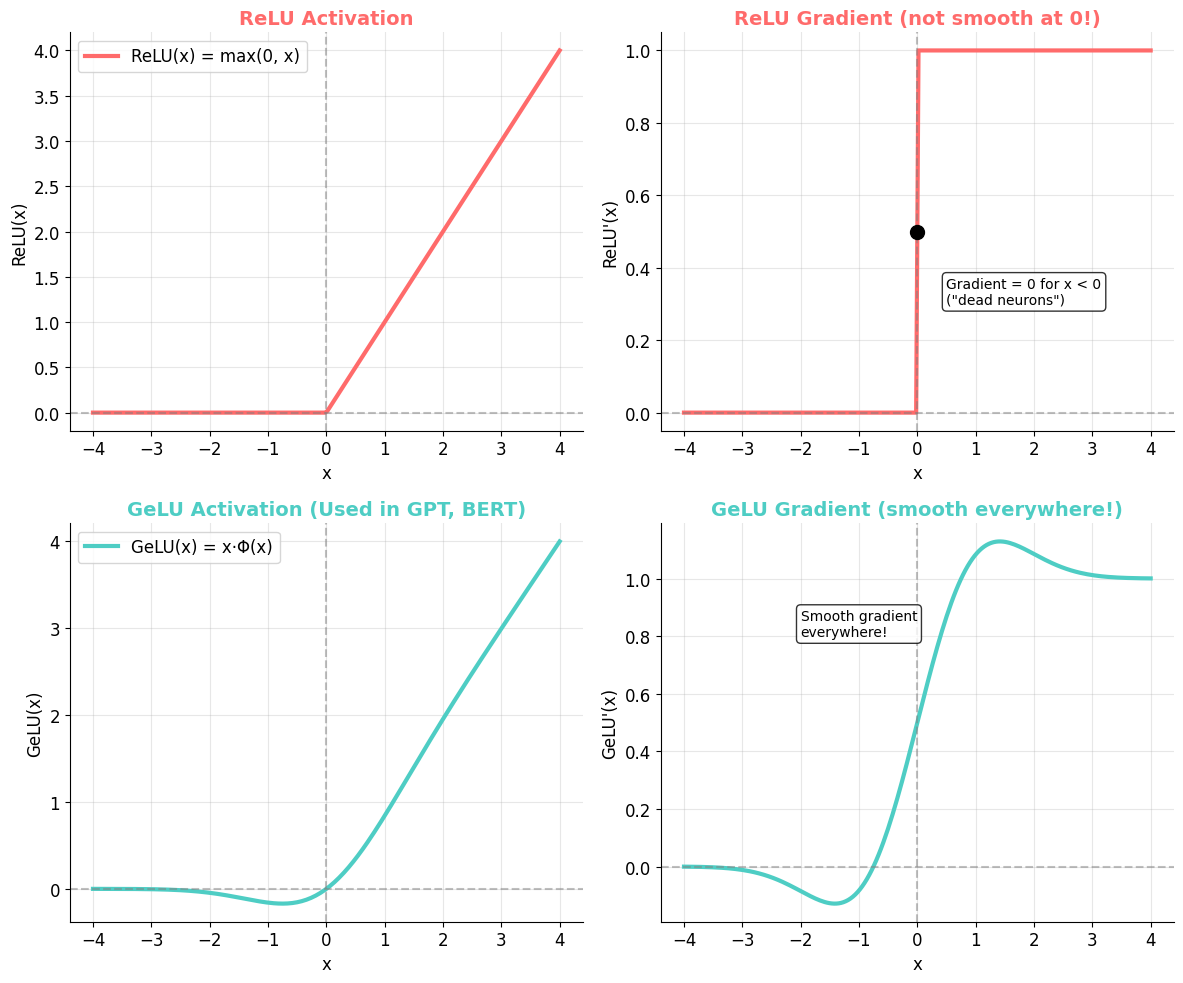

📸 Saved: relu_vs_gelu.png


In [32]:
from scipy.stats import norm

x = np.linspace(-4, 4, 200)

# ReLU and its derivative
relu = np.maximum(0, x)
relu_grad = np.where(x > 0, 1, 0)

# GeLU and its derivative (approximate)
gelu = x * norm.cdf(x)
gelu_grad = norm.cdf(x) + x * norm.pdf(x)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ReLU
ax = axes[0, 0]
ax.plot(x, relu, color=COLORS['coral'], linewidth=3, label='ReLU(x) = max(0, x)')
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('ReLU(x)', fontsize=12)
ax.set_title('ReLU Activation', fontsize=14, fontweight='bold', color=COLORS['coral'])
ax.legend()
ax.grid(True, alpha=0.3)

# ReLU gradient
ax = axes[0, 1]
ax.plot(x, relu_grad, color=COLORS['coral'], linewidth=3, label="ReLU'(x)")
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.scatter([0], [0.5], color='black', s=100, zorder=5)  # Undefined at 0
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel("ReLU'(x)", fontsize=12)
ax.set_title('ReLU Gradient (not smooth at 0!)', fontsize=14, fontweight='bold', color=COLORS['coral'])
ax.text(0.5, 0.3, 'Gradient = 0 for x < 0\n("dead neurons")', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.grid(True, alpha=0.3)

# GeLU
ax = axes[1, 0]
ax.plot(x, gelu, color=COLORS['teal'], linewidth=3, label='GeLU(x) = x·Φ(x)')
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('GeLU(x)', fontsize=12)
ax.set_title('GeLU Activation (Used in GPT, BERT)', fontsize=14, fontweight='bold', color=COLORS['teal'])
ax.legend()
ax.grid(True, alpha=0.3)

# GeLU gradient
ax = axes[1, 1]
ax.plot(x, gelu_grad, color=COLORS['teal'], linewidth=3, label="GeLU'(x)")
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel("GeLU'(x)", fontsize=12)
ax.set_title('GeLU Gradient (smooth everywhere!)', fontsize=14, fontweight='bold', color=COLORS['teal'])
ax.text(-2, 0.8, 'Smooth gradient\neverywhere!', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/relu_vs_gelu.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: relu_vs_gelu.png")

---

# Part 10: Putting It All Together - Training a Simple Network 🎯

In [33]:
# Create a simple dataset: learn XOR function
X = torch.tensor([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=torch.float32)

y = torch.tensor([
    [0],
    [1],
    [1],
    [0]
], dtype=torch.float32)

print("XOR Dataset:")
print("Input -> Output")
for xi, yi in zip(X, y):
    print(f"  {xi.numpy()} -> {yi.item()}")

XOR Dataset:
Input -> Output
  [0. 0.] -> 0.0
  [0. 1.] -> 1.0
  [1. 0.] -> 1.0
  [1. 1.] -> 0.0


In [34]:
# Simple network for XOR
class XORNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Create model, loss function, and optimizer
torch.manual_seed(42)
model = XORNet()
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=1.0, momentum=0.9)

# Training loop
losses = []
accuracies = []

print("Training...")
print("=" * 40)

for epoch in range(500):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Compute accuracy
    predictions = (y_pred > 0.5).float()
    accuracy = (predictions == y).float().mean().item()

    losses.append(loss.item())
    accuracies.append(accuracy)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0 or epoch == 499:
        print(f"Epoch {epoch:3d}: Loss = {loss.item():.4f}, Accuracy = {accuracy:.0%}")

print("\nTraining complete!")

Training...
Epoch   0: Loss = 0.7220, Accuracy = 50%
Epoch 100: Loss = 0.0000, Accuracy = 100%
Epoch 200: Loss = 0.0000, Accuracy = 100%
Epoch 300: Loss = 0.0000, Accuracy = 100%
Epoch 400: Loss = 0.0000, Accuracy = 100%
Epoch 499: Loss = 0.0000, Accuracy = 100%

Training complete!


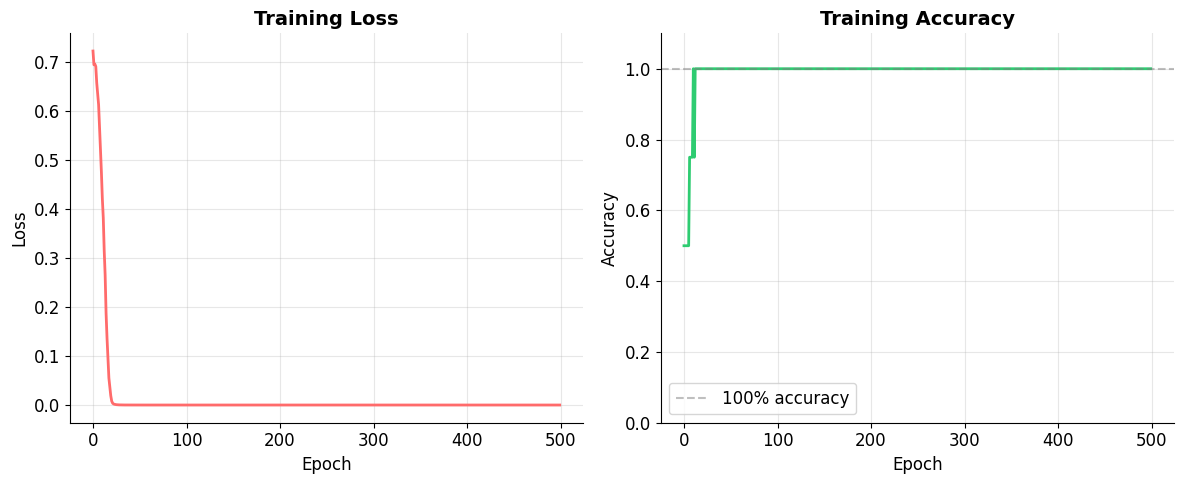

📸 Saved: training_progress.png


In [35]:
# Plot training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(losses, color=COLORS['coral'], linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training Loss', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(accuracies, color=COLORS['green'], linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Training Accuracy', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1.1)
ax2.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='100% accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/training_progress.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("📸 Saved: training_progress.png")

In [36]:
# Test the trained model
print("\n🧪 Testing the trained model:")
print("=" * 40)
with torch.no_grad():
    for xi, yi in zip(X, y):
        pred = model(xi.unsqueeze(0))
        pred_class = "1" if pred.item() > 0.5 else "0"
        correct = "✅" if pred_class == str(int(yi.item())) else "❌"
        print(f"  {xi.numpy()} -> {pred.item():.3f} -> {pred_class} (actual: {int(yi.item())}) {correct}")


🧪 Testing the trained model:
  [0. 0.] -> 0.000 -> 0 (actual: 0) ✅
  [0. 1.] -> 1.000 -> 1 (actual: 1) ✅
  [1. 0.] -> 1.000 -> 1 (actual: 1) ✅
  [1. 1.] -> 0.000 -> 0 (actual: 0) ✅


---

# 🎉 Summary

Congratulations! You've learned:

1. **Tensors** - Multi-dimensional arrays that store data and parameters
2. **Gradient Descent** - An algorithm to minimize loss by following the slope downhill
3. **Backpropagation** - Automatic computation of gradients through the chain rule
4. **PyTorch Autograd** - How PyTorch automatically tracks and computes gradients
5. **Optimization Challenges** - Vanishing/exploding gradients, local minima
6. **Momentum** - Building up speed to overcome obstacles
7. **SGD** - Using random batches for faster, noisier updates
8. **Activation Functions** - ReLU vs GeLU and why smoothness matters

## 📚 Key Equations

**Gradient Descent:**
$$\theta^{t+1} = \theta^t - \eta \nabla_\theta J(\theta^t)$$

**Momentum:**
$$v^{t+1} = \mu v^t - \eta \nabla_\theta J(\theta^t)$$
$$\theta^{t+1} = \theta^t + v^{t+1}$$

**Chain Rule (Backpropagation):**
$$\frac{\partial J}{\partial \theta} = \frac{\partial J}{\partial h_L} \cdot \frac{\partial h_L}{\partial h_{L-1}} \cdots \frac{\partial h_1}{\partial \theta}$$

---

## 🔗 Further Reading

- [PyTorch Tutorial](https://pytorch.org/tutorials/)
- [Distill.pub: Why Momentum Really Works](https://distill.pub/2017/momentum/)
- [Distill.pub: Feature Visualization](https://distill.pub/2017/feature-visualization/)
- [3Blue1Brown: Neural Networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

In [37]:
print("\n" + "="*60)
print("🎓 All generated images saved in /tmp/")
print("="*60)
import os
for f in sorted(os.listdir('/tmp')):
    if f.endswith('.png'):
        print(f"  📸 {f}")


🎓 All generated images saved in /tmp/
  📸 computational_graph.png
  📸 gradient_descent_1d.png
  📸 gradient_descent_2d.png
  📸 gradient_flow_mlp.png
  📸 learning_rate_comparison.png
  📸 loss_landscape_challenges.png
  📸 momentum_comparison.png
  📸 optimization_comparison.png
  📸 relu_vs_gelu.png
  📸 sgd_comparison.png
  📸 simple_loss_function.png
  📸 tensor_dimensions.png
  📸 training_progress.png
